In [1]:
# do not change code here
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
pd.set_option('chained_assignment',None)
import stemgraphic

In [25]:

def load_dataset(filename):
    """
      Input: filename - name of the file to load
             the colnames are - A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
             Note that the csv file doesn't contain column names, so read it appropriately.
      Output: return a pandas dataframe containing the dataset
      """
    # YOUR CODE HERE
    #raise NotImplementedError()
    crdata=pd.read_csv(filename, header=None)
    crdata.columns=['Year', 'Month', 'Day', 'Hour', 'GHI', 'Wind Speed']
    return crdata

In [67]:
df= load_dataset('Year_2000.csv')

In [58]:
df.head(20)

,Year,Month,Day,Hour,GHI,Wind Speed
0,2000,1,1,0,0,3.736798
1,2000,1,1,1,0,3.702789
2,2000,1,1,2,0,3.614095
3,2000,1,1,3,0,3.487340
4,2000,1,1,4,0,3.319650
5,2000,1,1,5,0,2.417165
6,2000,1,1,6,0,2.547561
7,2000,1,1,7,0,2.647270
8,2000,1,1,8,142,2.350662
9,2000,1,1,9,334,1.614910


In [59]:
len(df)

8760

In [60]:
264/24

11.0

In [61]:
df_filtered = df[(int(df['Wind Speed']))] 
dfd=df_filtered[(df_filtered['Day'])<2]  
dfd=dfd[(dfd['Month'])<2 ]
dfd.head(32)

TypeError: cannot convert the series to <class 'int'>

In [62]:
dff=df_filtered

In [63]:
dff['Wind Speed']

0        3.736798
1        3.702789
2        3.614095
3        3.487340
4        3.319650
           ...   
96355         NaN
96356         NaN
96357         NaN
96358         NaN
96359         NaN
Name: Wind Speed, Length: 96360, dtype: float64

(array([ 271.,  857., 1268., 1578., 1582., 1453.,  993.,  494.,  212.,
          52.]),
 array([0.0252213 , 0.77525511, 1.52528892, 2.27532274, 3.02535655,
        3.77539036, 4.52542417, 5.27545799, 6.0254918 , 6.77552561,
        7.52555942]),
 <a list of 10 Patch objects>)

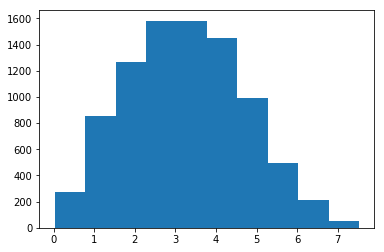

In [65]:
plt.hist(df['Wind Speed'])

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
#df= load_dataset('alldata.csv')
df= load_dataset('alldata2.csv')
series= df[df["Hour"]==2]['Wind Speed']
#series=df[dff["Day"==1]]['Wind Speed']
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
pyplot.show()

In [ ]:
df= load_dataset('alldata2.csv')

In [ ]:
plt.scatter(dff['Hour'],dff['Wind Speed'])

In [ ]:
plt.scatter(dff['Month'],dff['Wind Speed'])

In [ ]:
plt.scatter(dff['Day'],dff['Wind Speed'])

In [ ]:
plt.scatter(dfd['Hour'],dfd['Wind Speed'])

In [ ]:
plt.scatter(df['Hour'],df['Wind Speed'])

In [ ]:
plt.scatter(df['Year'],df['Wind Speed'])

In [ ]:
sp.stats.kstest(dff['Wind Speed'], 'norm')

In [ ]:
dff['Wind Speed'].dtype

In [ ]:
sp.stats.kstest(dff['Wind Speed'], 'expon')

In [ ]:
sp.stats.normaltest(dff['Wind Speed'])

In [ ]:
df.boxplot(column=['Wind Speed'],by='Year',return_type='axes')

In [ ]:
df.groupby(['Year']).corr()

In [ ]:
df.diff().corr()

In [ ]:
df.corr()

In [ ]:
sp.stats.kurtosis(df['Wind Speed'])

In [ ]:
sp.stats.kurtosistest(df['Wind Speed'])

In [ ]:
sp.stats.dweibull(df['Wind Speed'])

In [ ]:
sp.stats.skew(df['Wind Speed'])

In [ ]:
sp.stats.skewtest(df['Wind Speed'])

In [ ]:
stemgraphic.stem_graphic(df['Wind Speed'], scale = 1)

In [ ]:
(df['Month']).dtype

In [ ]:
sp.stats.norm.fit(df['Wind Speed'])

In [ ]:
import matplotlib.pyplot as plt 
  
data = df['Wind Speed'] 
  
# separating the stem parts 
stems = [1, 1, 2, 2, 2, 4, 4, 4, 5, 5] 
  
plt.ylabel('Data')   # for label at y-axis 
  
plt.xlabel('stems')   # for label at x-axis 
  
plt.xlim(0, 10)   # limit of the values at x axis 
  
plt.stem(stems, data)   # required plot 

In [ ]:
rolling_mean = df['Wind Speed'].rolling(window = 100).mean()
rolling_std = df['Wind Speed'].rolling(window = 100).std()
plt.plot(df['Wind Speed'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
ARIMA(df, order=(1, 1, 1))

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(data)
pyplot.show()

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
data = df['Wind Speed'] 

In [ ]:
data

In [ ]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data =df
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = df['Wind Speed']
result = seasonal_decompose(series, model='multiplicative', freq=14*12)
result.plot()
pyplot.show()

In [6]:
import scipy.stats as s
import numpy as np
from scipy import stats


def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


data = df['Wind Speed']

(loc, scale) = s.exponweib.fit_loc_scale(data, 1, 1)
print('loc is: ',loc, '\n scale is: ', scale)

loc is:  0 
 scale is:  1


In [69]:
df['Wind Speed']

0       3.736798
1       3.702789
2       3.614095
3       3.487340
4       3.319650
          ...   
8755    3.338511
8756    3.630050
8757    3.752012
8758    3.776443
8759    3.766600
Name: Wind Speed, Length: 8760, dtype: float64

In [68]:
from scipy.stats import weibull_min
shape, loc, scale = weibull_min.fit(df['Wind Speed'], floc=0)
print('location:',loc)
print('shape:',shape)
print('scale:',scale)

location: 0
shape: 2.409519899209047
scale: 3.662176150937651


In [31]:
shape

0.05668459261699145